In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

C:\Users\zydar\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('./data/SR99_VDS1005210_2016_fill.csv', delimiter=';', parse_dates=True, index_col='datetime')

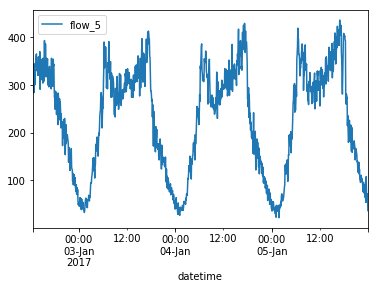

flow_5    106848
dtype: int64

In [3]:
df[-1000:].plot()
plt.show()
df.count()

In [14]:
def test_stationarity(timeseries):
    # 平稳性检测
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.1:
        print('Stationarity')
        return True
    else:
        print('Not Stationarity')
        return False

In [9]:
timeseries = df.values.flatten()

In [17]:
test_stationarity(timeseries[:500])

Results of Dickey-Fuller Test
Test Statistic                  -1.940026
p-value                          0.313472
#Lags Used                      18.000000
Number of Observations Used    481.000000
Critical Value (5%)             -2.867568
Critical Value (1%)             -3.444018
Critical Value (10%)            -2.569980
dtype: float64
Not Stationarity


False

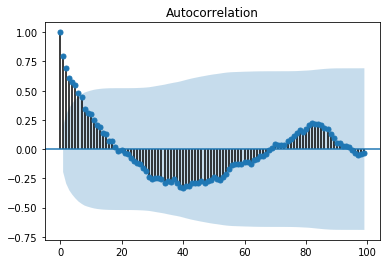

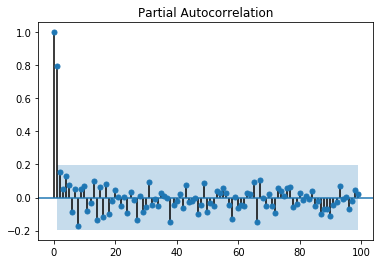

In [19]:
fig = plt.figure(figsize=(16,4))
plot_acf(timeseries[: 100])
plot_pacf(timeseries[: 100])
plt.show()

In [35]:
series_diff = df.flow_5.diff(2016)[2016:] # 差分，减去上一周的数据

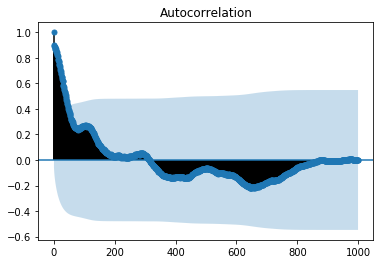

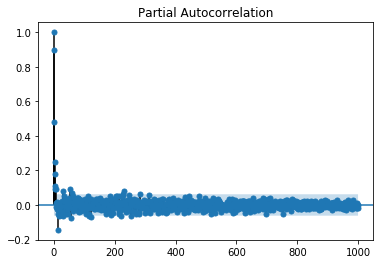

In [42]:
fig = plt.figure(figsize=(16,4))
plot_acf(series_diff[: 1000])
plot_pacf(series_diff[: 1000])
plt.show()